In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [5]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [8]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [9]:
df = pd.read_csv("adult.data", sep=",", names=cols)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [344]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [351]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [404]:
df[df['native-country'] == ' United-States'].shape[0]/df.shape[0]

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0, 0.5, 'количество')

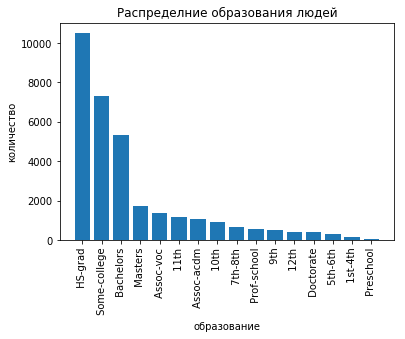

In [21]:
plt.bar(df['education'].value_counts().index, df['education'].value_counts().values)
plt.xticks(rotation='vertical')
plt.title('Распределние образования людей')
plt.xlabel('образование')
plt.ylabel('количество')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [475]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].mean()

185802.79045689848

In [476]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].std()

105646.78945933603

[0, 600000, 0, 250]

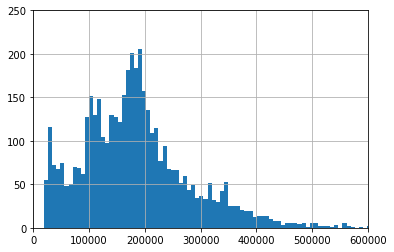

In [36]:
plot_hist = df[df['marital-status'] == ' Divorced']['fnlwgt'].hist(bins=200)
plot_hist.axis([0, 600000, 0, 250])

> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [544]:
x = df[(df['result'] == ' >50K') & 
   ((df['education'] == ' Doctorate') | (df['education'] == ' Bachelors') | (df['education'] == ' Masters'))].shape[0]

In [524]:
y = df[(df['result'] == ' >50K') & 
   (df['education'] != ' Doctorate') & (df['education'] != ' Bachelors') & (df['education'] != ' Masters')].shape[0]

In [525]:
x / y

0.800459242250287

> Ответ: Правда / Нет.

In [ ]:
Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [567]:
df.groupby('education')['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [568]:
df.groupby('sex')['hours-per-week'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [44]:
df[df['relationship'].isin([' Not-in-family', ' Unmarried'])]['hours-per-week'].mean()

40.157944004765554

In [53]:
df[~df['relationship'].isin([' Not-in-family', ' Unmarried'])]['hours-per-week'].mean()

40.595290725612685

In [ ]:
Те, кто в отношениях

# Из каких стран люди работают farmers/fishers?

In [580]:
df[df['occupation'] == ' Farming-fishing']['native-country'].value_counts()

 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Philippines        4
 Guatemala          4
 Canada             2
 El-Salvador        2
 Vietnam            2
 Italy              2
 Cuba               2
 Cambodia           1
 France             1
 Japan              1
 Poland             1
 Ireland            1
 Hong               1
 England            1
 Portugal           1
 Germany            1
 Yugoslavia         1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [57]:
df['hours-per-week'].max()

99

In [59]:
df[df['hours-per-week'] == df['hours-per-week'].max()].shape[0]

85

In [67]:
print(df[df['hours-per-week'] == df['hours-per-week'].max()]['capital-gain'].to_string())

935          0
1172         0
1887         0
3578         0
4086         0
4308         0
4441         0
5376         0
5432      2354
6618         0
6898         0
8072         0
8393         0
8654         0
8796     15024
9811         0
9831         0
10143        0
10266        0
10468        0
10986        0
11833        0
12209        0
12625        0
12788        0
13558        0
13580        0
13617     4416
13858        0
14593        0
15016        0
15180        0
15356        0
15460        0
15534        0
16604     6418
16868     2407
16992        0
17611        0
18603        0
18881        0
19053        0
19141        0
19399        0
19529        0
19731        0
19997        0
20036        0
21056        0
21147        0
22216        0
22313        0
22557        0
22720        0
23179     2907
23226        0
23398        0
23649    15024
23830        0
24483        0
25354        0
25713        0
25806        0
25831        0
25986        0
26250        0
26596     